# Proyek Analisis Data: [bike-sharing-dataset]
- **Nama:** [Benny Alaster]
- **Email:** [mc333d5y1629@student.devacademy.id]
- **ID Dicoding:** [bennyalaster]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda sepanjang tahun?
- Bagaimana pola peminjaman sepeda berdasarkan jam dalam sehari?
- Bagaimana tren peminjaman berdasarkan musim?
- Bagaimana tren peminjaman berdasarkan cuaca?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [4]:
#Load Dataset
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01/01/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01/01/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01/01/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01/01/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Gathering Data

In [7]:
# Gathering Data
hour_df = pd.read_csv("/content/hour.csv")
day_df = pd.read_csv("/content/day.csv")

**Insight:**
- Data hour
- Data day

### Assessing Data

In [8]:
# Melihat informasi umum tentang dataset
day_info = day_df.info()
hour_info = hour_df.info()
print("Informasi Dataset Harian:")
day_df.info()
print("\nInformasi Dataset Per Jam:")
hour_df.info()

# Melihat statistik deskriptif
day_desc = day_df.describe()
hour_desc = hour_df.describe()
print("\nStatistik Deskriptif Dataset Harian:")
print(day_desc)
print("\nStatistik Deskriptif Dataset Per Jam:")
print(hour_desc)

# Memeriksa jumlah nilai unik di setiap kolom
print("\nJumlah Nilai Unik di Setiap Kolom (Harian):")
print(day_df.nunique())
print("\nJumlah Nilai Unik di Setiap Kolom (Per Jam):")
print(hour_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- Beberapa kolom memiliki tipe data numerik (int64 dan float64), seperti cnt (jumlah peminjaman), temp (suhu), windspeed, dan hum (kelembaban).
- Beberapa kolom harus dikonversi ke tipe kategori (season, yr, mnth, holiday, weekday, workingday, dan weathersit).

### Cleaning Data

In [10]:
# Menghapus data duplikat jika ada
day_df = day_df.drop_duplicates()
hour_df = hour_df.drop_duplicates()

# Menangani nilai yang hilang (jika ada)
day_df = day_df.dropna()
hour_df = hour_df.dropna()

# Menghapus kolom yang tidak relevan
columns_to_drop = ["instant", "casual", "registered"]
day_df = day_df.drop(columns=[col for col in columns_to_drop if col in day_df.columns])
hour_df = hour_df.drop(columns=[col for col in columns_to_drop if col in hour_df.columns])

# Mengonversi kategori ke tipe data yang sesuai
categorical_cols = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
for col in categorical_cols:
    day_df[col] = day_df[col].astype("category")
    hour_df[col] = hour_df[col].astype("category")

**Insight:**
*  Kolom "instant", "casual", "registered" dihapus karena tidak relevan
*   untuk analisis umum. Nilai yang hilang (NaN) sudah ditangani sehingga dataset lebih bersih.

## Exploratory Data Analysis (EDA)

### Explore ...

<ipython-input-29-702a4415b608>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.lineplot(x=day_df.groupby("mnth")["cnt"].mean().index,  # Changed day_dfpby to day_df.groupby
<ipython-input-29-702a4415b608>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y=day_df.groupby("mnth")["cnt"].mean().values,


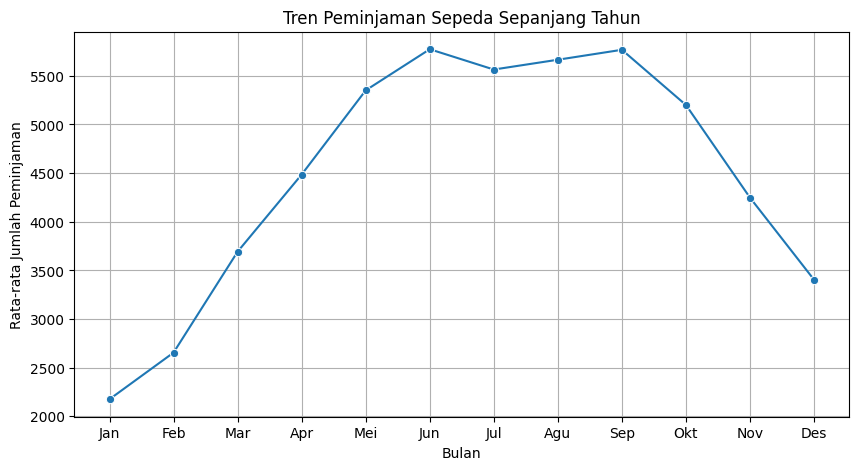

In [ ]:
# Analisis Tren Peminjaman Sepeda Sepanjang Tahun
plt.figure(figsize=(10, 5))
sns.lineplot(x=day_df.groupby("mnth")["cnt"].mean().index,  # Changed day_dfpby to day_df.groupby
             y=day_df.groupby("mnth")["cnt"].mean().values,
             marker="o")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.title("Tren Peminjaman Sepeda Sepanjang Tahun")
plt.grid()
plt.show()

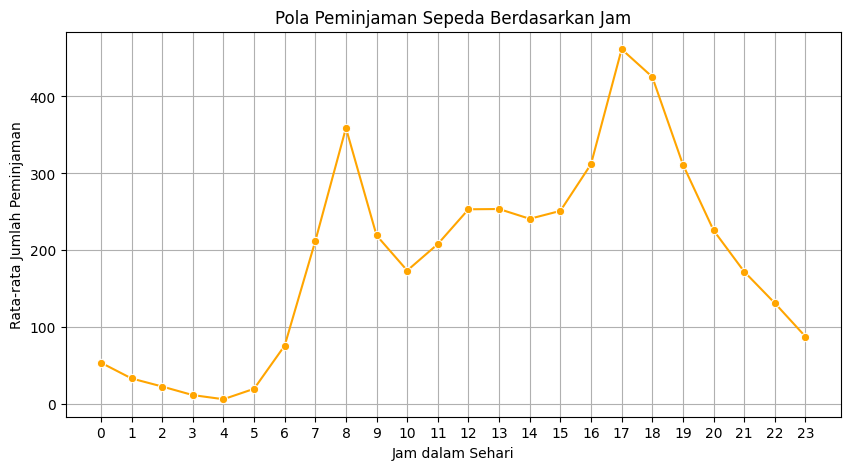

In [ ]:
# Analisis Pola Peminjaman Sepeda Berdasarkan Jam
plt.figure(figsize=(10, 5))
sns.lineplot(x=hour_df.groupby("hr")["cnt"].mean().index,
             y=hour_df.groupby("hr")["cnt"].mean().values,
             marker="o", color="orange")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.title("Pola Peminjaman Sepeda Berdasarkan Jam")
plt.xticks(range(0, 24))
plt.grid()
plt.show()


**Insight:**
- Peminjaman memiliki puncak di bulan juni dan september
- peminjaman paling banyak terjadi jam 17:00

Preview of Cleaned Day Dataset:
       dteday season yr mnth holiday weekday workingday weathersit      temp  \
0  01/01/2011      1  0    1       0       6          0          2  0.344167   
1  02/01/2011      1  0    1       0       0          0          2  0.363478   
2  03/01/2011      1  0    1       0       1          1          1  0.196364   
3  04/01/2011      1  0    1       0       2          1          1  0.200000   
4  05/01/2011      1  0    1       0       3          1          1  0.226957   

      atemp       hum  windspeed   cnt  
0  0.363625  0.805833   0.160446   985  
1  0.353739  0.696087   0.248539   801  
2  0.189405  0.437273   0.248309  1349  
3  0.212122  0.590435   0.160296  1562  
4  0.229270  0.436957   0.186900  1600  

Basic Statistics:
             temp       atemp         hum   windspeed          cnt
count  731.000000  731.000000  731.000000  731.000000   731.000000
mean     0.495385    0.474354    0.627894    0.190486  4504.348837
std      0.183051    

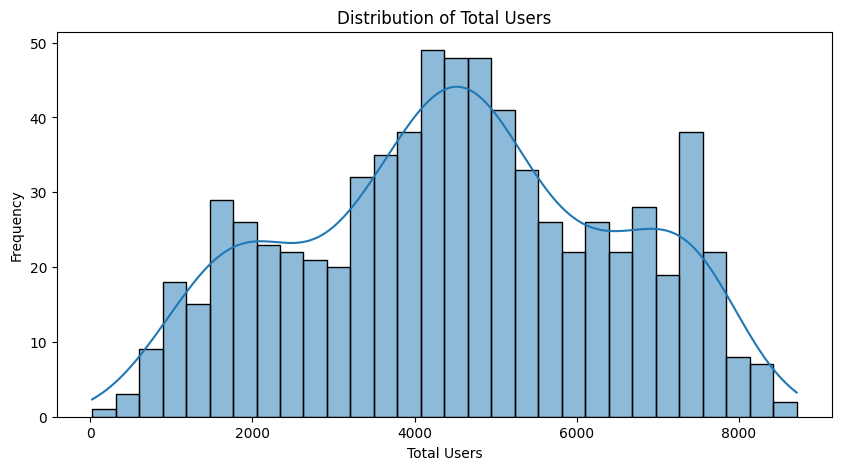

<ipython-input-16-4af3b78a7f38>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_agg = day_df.groupby("mnth")["cnt"].sum().reset_index()


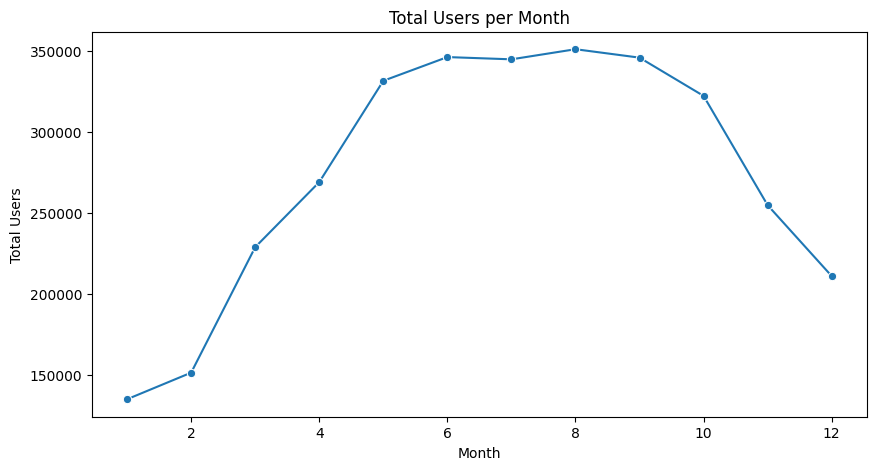

In [16]:
print("Preview of Cleaned Day Dataset:")
print(day_df.head())
print("\nBasic Statistics:")
print(day_df.describe())

# Visualizing Distribution
plt.figure(figsize=(10, 5))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribution of Total Users')
plt.xlabel('Total Users')
plt.ylabel('Frequency')
plt.show()

# Aggregation Example
day_agg = day_df.groupby("mnth")["cnt"].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=day_agg, x="mnth", y="cnt", marker="o")
plt.title("Total Users per Month")
plt.xlabel("Month")
plt.ylabel("Total Users")
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peminjaman sepeda sepanjang tahun?

<ipython-input-32-26377d063558>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.lineplot(x=day_df.groupby("mnth")["cnt"].mean().index,  # Changed day_dfpby to day_df.groupby
<ipython-input-32-26377d063558>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y=day_df.groupby("mnth")["cnt"].mean().values,


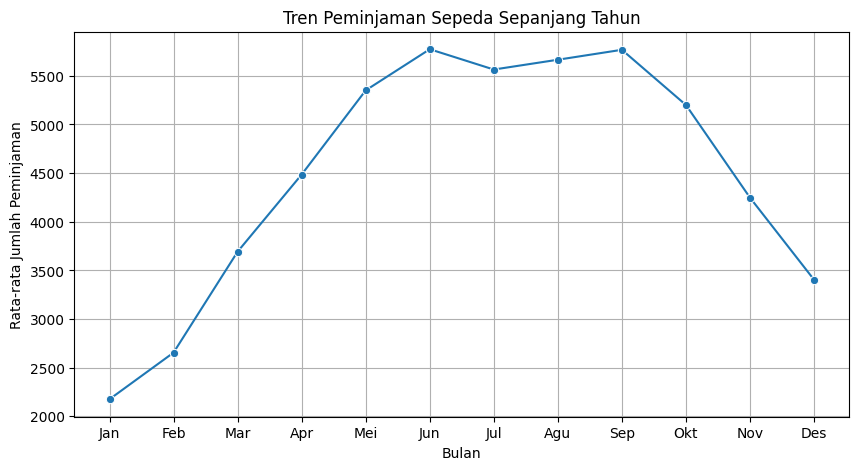

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=day_df.groupby("mnth")["cnt"].mean().index,  # Changed day_dfpby to day_df.groupby
             y=day_df.groupby("mnth")["cnt"].mean().values,
             marker="o")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.title("Tren Peminjaman Sepeda Sepanjang Tahun")
plt.grid()
plt.show()

### Pertanyaan 2: Bagaimana pola peminjaman sepeda berdasarkan jam dalam sehari?

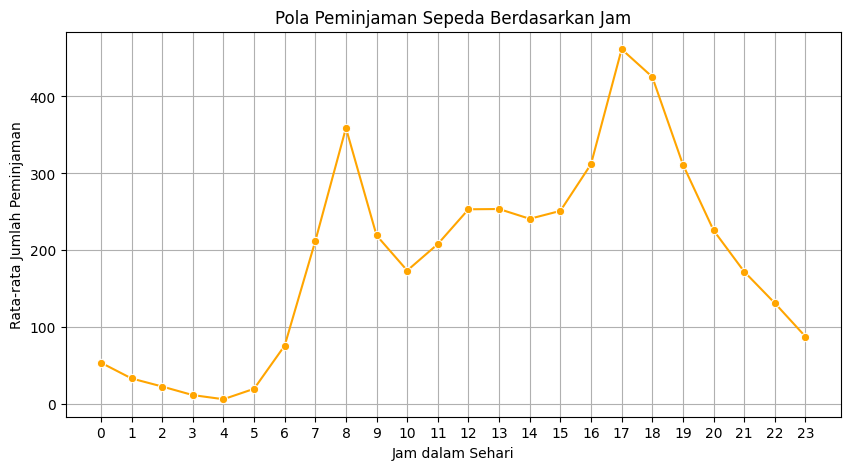

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=hour_df.groupby("hr")["cnt"].mean().index,
             y=hour_df.groupby("hr")["cnt"].mean().values,
             marker="o", color="orange")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.title("Pola Peminjaman Sepeda Berdasarkan Jam")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

**Insight:**
1.   Tren Peminjaman Sepeda Sepanjang Tahun
*   Jumlah peminjaman sepeda Tampak meningkat dari awal tahun dan mencapai puncaknya di bulan **Mei - Oktober**.

*   terjadi penurunan yang signifikan dari bulan **November - Februari**, kemungkinan ini disebabkan oleh musim dingin yang kurang kondusif untuk bersepeda.

2.   Pola Peminjaman Sepeda Berdasarkan Jam

*   Peminjaman sepeda memiliki dua puncak utama dalam sehari, yaitu pukul **7-9 pagi** dan **17-19 sore.** Ini karena banyak orang menggunakan untuk pergi dan pulang dari sekolah atau tempat kerja

*   Pada malam hari dan dini hari (pukul 00:00 - 06:00), peminjaman sepeda relatif rendah, ya wajar karena kebanyakan orang beristirahat.


## Analisis Lanjutan (Opsional)

### Pertanyaan 3: Bagaimana tren peminjaman sepeda berdasarkan musim?

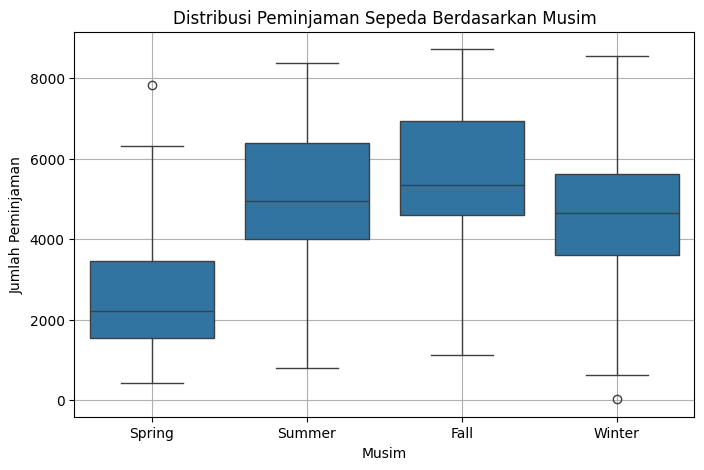

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="season", y="cnt", data=day_df)
plt.xticks([0, 1, 2, 3], ["Spring", "Summer", "Fall", "Winter"])
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman")
plt.title("Distribusi Peminjaman Sepeda Berdasarkan Musim")
plt.grid()
plt.show()


**Insight:**

Jumlah peminjaman sepeda paling tinggi terjadi pada musim gugur (fall). Ini bisa jadi karena cuaca yang lebih nyaman dibandingkan musim panas yang terik atau musim dingin yang terlalu dingin.

Musim semi (spring) memiliki jumlah
peminjaman terendah, ini mungkin karena hujan lebih sering terjadi.

### Pertanyaan 4: Bagaimana tren peminjaman sepeda berdasarkan cuaca?

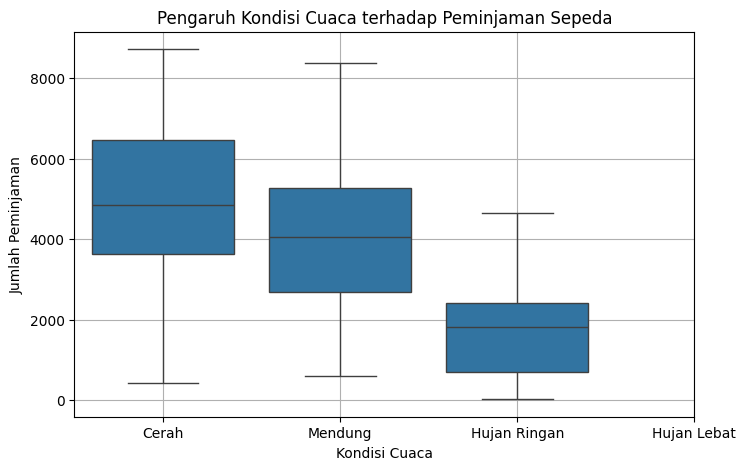

In [ ]:
# Visualisasi pengaruh cuaca terhadap peminjaman sepeda
plt.figure(figsize=(8, 5))
sns.boxplot(x="weathersit", y="cnt", data=day_df)
plt.xticks([0, 1, 2, 3], ["Cerah", "Mendung", "Hujan Ringan", "Hujan Lebat"])
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman")
plt.title("Pengaruh Kondisi Cuaca terhadap Peminjaman Sepeda")
plt.grid()
plt.show()

**Insight:**


*   Peminjaman Paling Banyak terjadi di cuaca cerah
*   Peminjaman Paling Sedkit terjadi di cuaca Ringan, Tidak ada yang meminjam saat hujan lebat

dapat disimpulkan peminjaman sepeda sangat terpengaruh cuaca, dimana orang memilih
 bersepeda saat cuaca cerah


## Conclusion

- Conclusion pertanyaan 1

Jumlah peminjaman sepeda cenderung meningkat dari awal tahun dan mencapai puncaknya sekitar bulan Mei hingga Oktober.

terjadi penurunan drastis dari bulan November hingga Februari, kemungkinan disebabkan oleh musim dingin yang kurang kondusif untuk bersepeda.

- Conclusion pertanyaan 2

Peminjaman sepeda memiliki dua puncak utama dalam sehari, yaitu sekitar pukul 07:00 - 09:00 pagi dan 17:00 - 19:00 sore. Ini karena banyak orang menggunakan untuk pergi/pulang dari sekolah atau tempat kerja

Pada malam hari dan dini hari (pukul 00:00 - 06:00), peminjaman sepeda relatif rendah, ya wajar karena kebanyakan orang beristirahat.

dapat disimpulkan bahwa :

**Musim gugur dan hari-hari cerah merupakan periode paling ideal untuk bisnis penyewaan sepeda**

**Peminjaman Sepeda Banyak Terjadi di Pukul 07:00 AM - 09:00 AM & 17:00 PM - 19:00 PM Kedua waktu Ini adalah waktu yang digunakan untuk berangkat kerja, dan sekolah serta, pulang kerja, dan sekolah.**  

In [34]:
day_df.to_csv("day.csv", index=False) # saves the day_df
hour_df.to_csv("hour.csv", index=False) # saves the hour_df

# Dashboard

In [17]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.0 MB/s eta 0:00:00


In [35]:
%%writefile proyek_analisis.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
day_df = pd.read_csv("/content/day.csv")
hour_df = pd.read_csv("/content/hour.csv")

# Convert date column
day_df["dteday"] = pd.to_datetime(day_df["dteday"], format='%d/%m/%Y')
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"], format='%d/%m/%Y')

st.title("Dashboard Peminjaman Sepeda 🚴🏻‍♀️")
# Sidebar Date Filter
start_date = st.sidebar.date_input("Start Date", day_df["dteday"].min())
end_date = st.sidebar.date_input("End Date", day_df["dteday"].max())

# Filter data based on date selection
filtered_df = day_df[(day_df["dteday"] >= pd.to_datetime(start_date)) & (day_df["dteday"] <= pd.to_datetime(end_date))]

# Display filtered data
st.write("### Filtered Data Preview", filtered_df.head())

# Monthly Trend
st.subheader("Tren Peminjaman Sepeda Sepanjang Tahun")
monthly_trend = day_df.groupby("mnth")["cnt"].mean()
fig, ax = plt.subplots()
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker="o", ax=ax)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
ax.set_xlabel("Bulan")
ax.set_ylabel("Rata-rata Jumlah Peminjaman")
ax.set_title("Tren Peminjaman Sepeda")
ax.grid()
st.pyplot(fig)

# Hourly Trend
st.subheader("Pola Peminjaman Sepeda Berdasarkan Jam")
hourly_trend = hour_df.groupby("hr")["cnt"].mean()
fig, ax = plt.subplots()
sns.lineplot(x=hourly_trend.index, y=hourly_trend.values, marker="o", color="orange", ax=ax)
ax.set_xlabel("Jam dalam Sehari")
ax.set_ylabel("Rata-rata Jumlah Peminjaman")
ax.set_title("Pola Peminjaman Sepeda")
ax.set_xticks(range(0, 24))
ax.grid()
st.pyplot(fig)

#Season trend
st.subheader("Tren Peminjaman Sepeda Berdasarkan Musim")
season_trend = day_df.groupby("season")["cnt"].mean()
fig, ax = plt.subplots()
sns.boxplot(x="season", y="cnt", data=day_df, ax=ax)
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(["Spring", "Summer", "Fall", "Winter"])
ax.set_xlabel("Musim")
ax.set_ylabel("Jumlah Peminjaman")
ax.set_title("Distribusi Peminjaman Sepeda Berdasarkan Musim")
ax.grid()
st.pyplot(fig)

#Weather trend
st.subheader("Tren Peminjaman Sepeda Berdasarkan Cuaca")
weather_trend = day_df.groupby("weathersit")["cnt"].mean()
fig, ax = plt.subplots()
sns.boxplot(x="weathersit", y="cnt", data=day_df)
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(["Cerah", "Mendung", "Hujan Ringan", "Hujan Lebat"])
ax.set_xlabel("Kondisi Cuaca")
ax.set_ylabel("Jumlah Peminjaman")
ax.set_title("Pengaruh Kondisi Cuaca terhadap Peminjaman Sepeda")
ax.grid()
st.pyplot(fig)


Overwriting proyek_analisis.py


In [36]:
!streamlit run proyek_analisis.py & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.199.120:8501

⠴⠦⠧your url is: https://fruity-groups-bake.loca.lt
  Stopping...
^C
